

---



---


# **Proyecto Final:**



---



---
## **ETL_EDA Google Maps Metadata_Sitios:**


---



---



## **Importar Librerias:**

In [2]:
# Importar librerias necesarias
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from pandas import json_normalize
from wordcloud import WordCloud
import datetime

Cargamos e importamos las librerias que concideramos necesarias para el desarrollo del proyecto.



---
## **Cargar los archivos .JSON:**


In [3]:
# Crear desde el  archivo JSON en un DataFrarame
data_folder = '/content/drive/MyDrive/Colab Notebooks/Proyecto Final/Data/metadata-sitios'
file_names_to_read = ['1.json', '2.json', '3.json', '4.json']
rows = []

for filename in file_names_to_read:
    file_path = os.path.join(data_folder, filename)
    with open(file_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                rows.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {filename}: {e}")

google_metada_sitios_1_4 = pd.DataFrame(rows)

In [4]:
# Visualizacion general de las variables y cantidad de entradas
google_metada_sitios_1_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100004 entries, 0 to 1100003
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   name              1099983 non-null  object 
 1   address           1062401 non-null  object 
 2   gmap_id           1100004 non-null  object 
 3   description       59044 non-null    object 
 4   latitude          1100004 non-null  float64
 5   longitude         1100004 non-null  float64
 6   category          1091716 non-null  object 
 7   avg_rating        1100004 non-null  float64
 8   num_of_reviews    1100004 non-null  int64  
 9   price             60509 non-null    object 
 10  hours             775726 non-null   object 
 11  MISC              798733 non-null   object 
 12  state             790032 non-null   object 
 13  relative_results  966389 non-null   object 
 14  url               1100004 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage:

In [5]:
# Crear una variable de restaurantes en el estado de 'Pennsylvania'
restaurantes_pa_1 = google_metada_sitios_1_4[google_metada_sitios_1_4['address'].str.contains('PA', na=False)]

In [6]:
restaurantes_pa_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47243 entries, 57 to 1099978
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              47243 non-null  object 
 1   address           47243 non-null  object 
 2   gmap_id           47243 non-null  object 
 3   description       2232 non-null   object 
 4   latitude          47243 non-null  float64
 5   longitude         47243 non-null  float64
 6   category          46902 non-null  object 
 7   avg_rating        47243 non-null  float64
 8   num_of_reviews    47243 non-null  int64  
 9   price             2623 non-null   object 
 10  hours             32569 non-null  object 
 11  MISC              35098 non-null  object 
 12  state             33173 non-null  object 
 13  relative_results  42784 non-null  object 
 14  url               47243 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 5.8+ MB


In [7]:
# Eliminar la variable que no se va a utilizar
del google_metada_sitios_1_4

In [8]:
# Crear desde el  archivo JSON en un DataFrarame
data_folder = '/content/drive/MyDrive/Colab Notebooks/Proyecto Final/Data/metadata-sitios'
file_names_to_read = ['5.json', '6.json', '7.json', '8.json']
rows = []

for filename in file_names_to_read:
    file_path = os.path.join(data_folder, filename)
    with open(file_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                rows.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {filename}: {e}")

google_metada_sitios_5_9 = pd.DataFrame(rows)

In [9]:
# Visualizacion general de las variables y cantidad de entradas
google_metada_sitios_5_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100004 entries, 0 to 1100003
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   name              1099994 non-null  object 
 1   address           1072629 non-null  object 
 2   gmap_id           1100004 non-null  object 
 3   description       97925 non-null    object 
 4   latitude          1100004 non-null  float64
 5   longitude         1100004 non-null  float64
 6   category          1094313 non-null  object 
 7   avg_rating        1100004 non-null  float64
 8   num_of_reviews    1100004 non-null  int64  
 9   price             104702 non-null   object 
 10  hours             818930 non-null   object 
 11  MISC              857095 non-null   object 
 12  state             834709 non-null   object 
 13  relative_results  997020 non-null   object 
 14  url               1100004 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage:

In [10]:
# Crear una variable de restaurantes en el estado de 'Pennsylvania'
restaurantes_pa_2 = google_metada_sitios_5_9[google_metada_sitios_5_9['address'].str.contains('PA', na=False)]

In [11]:
restaurantes_pa_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46142 entries, 6 to 1099972
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              46142 non-null  object 
 1   address           46142 non-null  object 
 2   gmap_id           46142 non-null  object 
 3   description       3513 non-null   object 
 4   latitude          46142 non-null  float64
 5   longitude         46142 non-null  float64
 6   category          45913 non-null  object 
 7   avg_rating        46142 non-null  float64
 8   num_of_reviews    46142 non-null  int64  
 9   price             4319 non-null   object 
 10  hours             33594 non-null  object 
 11  MISC              36476 non-null  object 
 12  state             34296 non-null  object 
 13  relative_results  42897 non-null  object 
 14  url               46142 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 5.6+ MB


In [12]:
# Eliminar la varable
del google_metada_sitios_5_9

In [13]:
# Crear desde el  archivo JSON en un DataFrarame
data_folder = '/content/drive/MyDrive/Colab Notebooks/Proyecto Final/Data/metadata-sitios'
file_names_to_read = ['9.json','10.json', '11.json']
rows = []

for filename in file_names_to_read:
    file_path = os.path.join(data_folder, filename)
    with open(file_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                rows.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {filename}: {e}")

google_metada_sitios_9_11 = pd.DataFrame(rows)

In [14]:
# Visualizacion general de las variables y cantidad de entradas
google_metada_sitios_9_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825003 entries, 0 to 825002
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              824997 non-null  object 
 1   address           809470 non-null  object 
 2   gmap_id           825003 non-null  object 
 3   description       97320 non-null   object 
 4   latitude          825003 non-null  float64
 5   longitude         825003 non-null  float64
 6   category          821563 non-null  object 
 7   avg_rating        825003 non-null  float64
 8   num_of_reviews    825003 non-null  int64  
 9   price             109992 non-null  object 
 10  hours             642950 non-null  object 
 11  MISC              678349 non-null  object 
 12  state             653815 non-null  object 
 13  relative_results  766544 non-null  object 
 14  url               825003 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 94.4+ MB


In [15]:
# Crear una variable de restaurantes en el estado de 'Pennsylvania'
restaurantes_pa_3 = google_metada_sitios_9_11[google_metada_sitios_9_11['address'].str.contains('PA', na=False)]

In [16]:
restaurantes_pa_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34126 entries, 56 to 824998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              34126 non-null  object 
 1   address           34126 non-null  object 
 2   gmap_id           34126 non-null  object 
 3   description       3780 non-null   object 
 4   latitude          34126 non-null  float64
 5   longitude         34126 non-null  float64
 6   category          33969 non-null  object 
 7   avg_rating        34126 non-null  float64
 8   num_of_reviews    34126 non-null  int64  
 9   price             4885 non-null   object 
 10  hours             26198 non-null  object 
 11  MISC              28571 non-null  object 
 12  state             26641 non-null  object 
 13  relative_results  32385 non-null  object 
 14  url               34126 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 4.2+ MB


In [17]:
# Eliminar la variable
del google_metada_sitios_9_11

In [18]:
# Crear una variable de restaurantes en el estado de 'Pennsylvania'
comercios_pa = pd.concat([restaurantes_pa_1, restaurantes_pa_2, restaurantes_pa_3], ignore_index=True)

In [19]:
# Eliminar las variables luego de la concatenacion
del restaurantes_pa_1, restaurantes_pa_2, restaurantes_pa_3

 **Observaciones:**

 - Realizamos las cargas de los archivos .Json que obtuvimos de los dataset brindados de Google Maps Metadata, los cuales era un total de 11.

 - Se eliminaron todos los registros que no corresponden al Estado de Pennsylvania, porque no seran tenidos en cuenta para el analisis de nuestro objetivo. Dejando un DataFrame mas acotado con los registros necesarios para mejorar la respuesta.

 - Fueron leidos y guardados por partes en Dataframe, para evitar problemas en el cargado, para luego unirlos con el codigo de concatenacion para que el resultado sea un DataFrame con el total de los datos brindados.

 - Se creo un DataFrame que contiene el total de comercios de la ciudad de Pennsylvania.




---



---
## **Visualizacion Genral del DataFrame:**


In [20]:
# Observar el tipo de variable y cantidad de entradas
comercios_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127511 entries, 0 to 127510
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              127511 non-null  object 
 1   address           127511 non-null  object 
 2   gmap_id           127511 non-null  object 
 3   description       9525 non-null    object 
 4   latitude          127511 non-null  float64
 5   longitude         127511 non-null  float64
 6   category          126784 non-null  object 
 7   avg_rating        127511 non-null  float64
 8   num_of_reviews    127511 non-null  int64  
 9   price             11827 non-null   object 
 10  hours             92361 non-null   object 
 11  MISC              100145 non-null  object 
 12  state             94110 non-null   object 
 13  relative_results  118066 non-null  object 
 14  url               127511 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 14.6+ MB


In [21]:
# Visualizar los 5 primeros registros
comercios_pa.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Primo Pizza & Subs,"Primo Pizza & Subs, 148 W St Joseph St, Easton...",0x89c46d5e4554eae1:0xa2f8b211524ca29a,None,40.682177,-75.209820,[Pizza delivery],4.5,25,$$,"[[Thursday, 11AM–9PM], [Friday, 11AM–10PM], [S...","{'Service options': ['No-contact delivery', 'D...",Open ⋅ Closes 9PM,"[0x89c46c56cac9c661:0xdc9d0dd3f2b203ae, 0x89c4...",https://www.google.com/maps/place//data=!4m2!3...
1,S.J. O’Hara Inc.,"S.J. O’Hara Inc., 143 White Oak Ct, Tannersvil...",0x89c48c790b767ec7:0x1943c20a42196a68,None,41.055487,-75.284536,"[HVAC contractor, Air conditioning contractor,...",4.5,8,None,"[[Thursday, 7AM–7PM], [Friday, 7AM–7PM], [Satu...","{'Health & safety': ['Appointment required', '...",Open ⋅ Closes 7PM,"[0x89c48c7bd96b49f9:0xdf562ab873031e1, 0x89c45...",https://www.google.com/maps/place//data=!4m2!3...
2,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,"Bubble tea shop offering hot & cold versions, ...",39.940293,-75.150923,[Restaurant],4.0,8,None,None,"{'Service options': ['Delivery'], 'Amenities':...",None,"[0x89c6c62a40f4b733:0x73bfeec1898f272b, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...
3,Kater Street Bicycle,"Kater Street Bicycle, 609 S 16th St, Philadelp...",0x89c6c63c8cd87141:0x54d0d283872eecbb,None,39.943673,-75.168762,"[Bicycle Shop, Bicycle repair shop]",4.9,15,None,"[[Thursday, 11AM–7PM], [Friday, 2–6PM], [Satur...",None,Permanently closed,"[0x89c6c623342d6197:0x70233738cd92d9b, 0x89c6c...",https://www.google.com/maps/place//data=!4m2!3...
4,Cadence Cycling and Cafe - Center City,"Cadence Cycling and Cafe - Center City, 201 S ...",0x89c6c715d1821fe3:0x9cfa8308c0ce2289,None,39.950078,-75.180729,"[Bicycle Shop, Bicycle repair shop, Coffee sho...",4.8,38,None,"[[Thursday, 7AM–7PM], [Friday, 7AM–7PM], [Satu...","{'Service options': ['In-store pickup', 'In-st...",Open ⋅ Closes 7PM,"[0x89c6c7d1a79d4103:0x2476b0fe30eb0871, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...


De esta manera comenzamos con el primer acercamientos a los Datos, observando desde las cantidad de Registros (127511) y con un total 15 columnas. Podemos ver las tipo de variables que forman el DataFrame, de manera que nos orientamos acerca del analisis y los datos que disponemos.

---

## **Descripcion de las columnas:**

In [22]:
# Se buscan los nombres de las columnas
comercios_pa.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

- name: Nombre del Comercio
- gmap_id: Identificador de Google Maps
- address: Direccion
- description: Detalles de la actividad del comercio
- latitude: Latidud
- longitude: Longitud
- category: Categoria del Comercio
- avg_rating: Promedio de Calificacion
- num_of_reviews: Numeros de Comentarios
- price: Precio
- hours: Horario de Apertura y Cierre
- MISC: Caracteriscticas opcionales de las instalaciones
- state: Estado en el que se encuentra el comercio (ej: Abre en un momento)
- relative_results:
- url: Direccion de Google Maps del Comercio

Generamos una Lista con el nombre de las columnas y el informe del contenido de las mismas, para tener de guia en el moento del analisis.



---
## **Cuantificar Valores Nulos:**


Procedemos a identificar la cantidad de valores nulos, como su porcentaje, tanto del total del dataframe como el de cada columna en particular. Esto ayuda para luego tomar una descision sobre los mismos.

In [23]:
# Verificar si cada fila tiene todos los valores nulos
filas_con_nulos = comercios_pa.isna().all(axis=1).sum()
# Mostrar las filas que tienen todos los valores nulos
print(f'Cantidad de Filas con todos Valores Nulos: {filas_con_nulos}')

Cantidad de Filas con todos Valores Nulos: 0


In [24]:
# Cantidad total de valores nulos en todo el DataFrame
total_valores_nulos_dataframe = comercios_pa.isna().sum().sum()
print(f' Total de Valores nulos del DataFrame: {total_valores_nulos_dataframe}')

 Total de Valores nulos del DataFrame: 339759


In [25]:
# Total de celdas en el DataFrame
total_celdas = comercios_pa.size
print(f' Total de las celdas DataFrame: {total_celdas}')

 Total de las celdas DataFrame: 1912665


In [26]:
# Calcula el porcentaje total de valores nulos
porcentaje_total_valores_nulos_dataframe = (total_valores_nulos_dataframe / total_celdas) * 100
# Muestra el porcentaje total de valores nulos
print(f'Porcentaje total de valores nulos en el DataFrame: {round(porcentaje_total_valores_nulos_dataframe, 2)}%')

Porcentaje total de valores nulos en el DataFrame: 17.76%


In [27]:
# Cantidad de Valores Nulos por columna
total_valores_nulos = comercios_pa.isna().sum()
total_valores_nulos

name                     0
address                  0
gmap_id                  0
description         117986
latitude                 0
longitude                0
category               727
avg_rating               0
num_of_reviews           0
price               115684
hours                35150
MISC                 27366
state                33401
relative_results      9445
url                      0
dtype: int64

In [28]:
# Cantidad de valores nulos en cada columna
total_valores_nulos = comercios_pa.isna().sum()
# Porcentaje de valores nulos en cada columna
porcentaje_valores_nulos = (total_valores_nulos / len(comercios_pa)) * 100
# Mostrar los porcentajes por columnas
print(porcentaje_valores_nulos)

name                 0.000000
address              0.000000
gmap_id              0.000000
description         92.530056
latitude             0.000000
longitude            0.000000
category             0.570147
avg_rating           0.000000
num_of_reviews       0.000000
price               90.724722
hours               27.566249
MISC                21.461678
state               26.194603
relative_results     7.407204
url                  0.000000
dtype: float64


**Observaciones:**

- Se destacan las columnas 'description' y 'price' con un gran porcentaje de valores nulos.

In [29]:
comercios_pa['address']

0         Primo Pizza & Subs, 148 W St Joseph St, Easton...
1         S.J. O’Hara Inc., 143 White Oak Ct, Tannersvil...
2         Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...
3         Kater Street Bicycle, 609 S 16th St, Philadelp...
4         Cadence Cycling and Cafe - Center City, 201 S ...
                                ...                        
127506    United House of Prayer for All People, 349 Rei...
127507    Infinity Transportation Services, 221 N Prince...
127508    Dunkin', 7000 Chester Ave, Philadelphia, PA 19142
127509    Reuben's Marc, 8131 Stenton Ave, Philadelphia,...
127510     Steak 48, 260 S Broad St, Philadelphia, PA 19102
Name: address, Length: 127511, dtype: object



---
## **Eliminar Columnas:**

Tomamos la decision de elegir cuales columnas seran necesarias para nuestro analisis, para hacer mas efectivo el trabajo.

In [30]:
# Se eliminan las columnas que no seran utilizadas para el analisis
comercios_pa = comercios_pa.drop(columns=['description', 'state', 'relative_results', 'url'])

**Observaciones:**

- Eliminamos las columnas 'description', 'num_of_reviews', 'state', 'relative_results', 'url' debido a que no proporcionan informacion relevante para el analisis o poseen valores que se encuentran en otras.



---

## **Modificar el contenido de las Columnas:**



Alteramos los tipos de variables para poder mejorar el procesamiento y las consultas correspondientes.

In [31]:
# Se moifican  las listas en cadenas de str para poder tratar los datos dentro de ellas
comercios_pa['category'] = comercios_pa['category'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


In [32]:
# Se transforman a minusculas para que se pueda realizar una busqueda mas precisa por categoria
comercios_pa['category'] = comercios_pa['category'].str.lower()

In [33]:
# Rellenar los valores NA con una cadena vacía
comercios_pa['category'].fillna('sin categoria', inplace=True)
# Seleccionar las filas que contienen la palabra restaurant
restaurantes_pa = comercios_pa[comercios_pa['category'].str.contains('restaurant', case=False)]


In [34]:
# Convertir listas de la columna 'hours' en cadenas de texto
def convertir_a_cadena(x):
    if x is None:
        return None
    else:
        return ', '.join([day + ' ' + time for day, time in x])

# Aplicar la función a la columna 'hours'
restaurantes_pa['hours'] = restaurantes_pa['hours'].apply(convertir_a_cadena)

# Verificar los cambios
print(restaurantes_pa['hours'])


2                                                      None
27        Thursday 6AM–2PM, Friday 6AM–2PM, Saturday 6AM...
28        Thursday 11AM–3AM, Friday 11AM–3AM, Saturday 1...
45        Thursday Closed, Friday 12–8PM, Saturday 12–8P...
75        Thursday Open 24 hours, Friday Open 24 hours, ...
                                ...                        
127470    Monday Closed, Tuesday 7AM–7PM, Wednesday 7AM–...
127497                                                 None
127504    Monday 10:30AM–9PM, Tuesday 10:30AM–9PM, Wedne...
127508    Monday 5:30AM–7:30PM, Tuesday 5:30AM–7:30PM, W...
127510    Monday 4–10PM, Tuesday 4–10PM, Wednesday 4–10P...
Name: hours, Length: 8671, dtype: object


<ipython-input-34-e83f75b4a4e4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurantes_pa['hours'] = restaurantes_pa['hours'].apply(convertir_a_cadena)


La modificacoin de la columna 'hours' se encontraba con listas anidadas, por lo que decidimos procesarlas para que queden desanidadas asi poder acceder a los datos de manera mas rapida.

In [35]:
# Expandir el diccionario en la columna 'MISC' en nuevas columnas
misc_expandido = json_normalize(restaurantes_pa['MISC'])

Creamos un nuevo Dataframe con la columna 'MISC' que estaba en forma de ojeto json, de esta manera se normaliza y la forma clave-valor toma la forma de columnas las claves y el contenido de las celdas el valor.

In [36]:
# Reinicio de indices de ambos DataFrames
restaurantes_pa.reset_index(drop=True, inplace=True)
misc_expandido.reset_index(drop=True, inplace=True)

# Concatenar las nuevas columnas al DataFrame original
restaurantes_pa = pd.concat([restaurantes_pa, misc_expandido], axis=1)

In [37]:
restaurantes_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8671 entries, 0 to 8670
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8671 non-null   object 
 1   address            8671 non-null   object 
 2   gmap_id            8671 non-null   object 
 3   latitude           8671 non-null   float64
 4   longitude          8671 non-null   float64
 5   category           8671 non-null   object 
 6   avg_rating         8671 non-null   float64
 7   num_of_reviews     8671 non-null   int64  
 8   price              4368 non-null   object 
 9   hours              7792 non-null   object 
 10  MISC               8624 non-null   object 
 11  Service options    8476 non-null   object 
 12  Amenities          6346 non-null   object 
 13  Atmosphere         5771 non-null   object 
 14  Crowd              4071 non-null   object 
 15  Highlights         2696 non-null   object 
 16  Popular for        5269 

In [38]:
# Eliminar la columna 'MISC' si ya no la necesitas
restaurantes_pa.drop(columns=['MISC'], inplace=True)

Reiniciamos los valores de ambos DataFrame, para no tener inconvenientes a la hora de la union a traves del eje de las columnas, para asi contar con las nuevas columnas que estaban anidadas. debido a que contamos con toda la informacion, procedemos a eliminar la columna 'MISC' que ya no sera de utilidad.

In [39]:
restaurantes_pa.head()

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,...,Highlights,Popular for,Offerings,Dining options,Planning,Health & safety,Accessibility,Payments,From the business,Health and safety
0,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,restaurant,4.0,8,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Silver moon shop and dine,"Silver moon shop and dine, 150 Silvermoon Ln, ...",0x89cf13093b01ec03:0xf5b017dfa69a4bb5,40.992932,-76.875134,restaurant,3.8,8,None,"Thursday 6AM–2PM, Friday 6AM–2PM, Saturday 6AM...",...,[Great coffee],"[Lunch, Dinner, Solo dining]","[Coffee, Comfort food, Quick bite]",[Dessert],NaN,NaN,NaN,NaN,NaN,NaN
2,Crown Fried Chicken,"Crown Fried Chicken, 208 East St, Bloomsburg, ...",0x89c587762e7e69dd:0x30a60dce48b073c3,41.004147,-76.453729,restaurant,4.2,18,$,"Thursday 11AM–3AM, Friday 11AM–3AM, Saturday 1...",...,NaN,[Solo dining],[Quick bite],NaN,[Accepts reservations],NaN,NaN,NaN,NaN,NaN
3,Judges Corner,"Judges Corner, 848 E 5th St, Erie, PA 16507",0x882d7fc7b02c7a39:0xedc083a71e5be96d,42.137736,-80.066740,soul food restaurant,4.2,8,None,"Thursday Closed, Friday 12–8PM, Saturday 12–8P...",...,NaN,"[Lunch, Dinner, Solo dining]","[Comfort food, Quick bite]",[Dessert],NaN,NaN,NaN,NaN,NaN,NaN
4,Wawa,"Wawa, 870 2nd St Pike, Richboro, PA 18954",0x89c6ac87db2a14b9:0x574dceb7c72ce463,40.210823,-75.012080,"convenience store, breakfast restaurant, cafe,...",3.6,34,$,"Thursday Open 24 hours, Friday Open 24 hours, ...",...,NaN,NaN,NaN,NaN,[Quick visit],"[Mask required, Staff required to disinfect su...",[Wheelchair accessible entrance],"[NFC mobile payments, Credit cards]",NaN,NaN


In [40]:
restaurantes_pa.columns

Index(['name', 'address', 'gmap_id', 'latitude', 'longitude', 'category',
       'avg_rating', 'num_of_reviews', 'price', 'hours', 'Service options',
       'Amenities', 'Atmosphere', 'Crowd', 'Highlights', 'Popular for',
       'Offerings', 'Dining options', 'Planning', 'Health & safety',
       'Accessibility', 'Payments', 'From the business', 'Health and safety'],
      dtype='object')

In [41]:
columnas_convertir = ['Service options', 'Highlights', 'Popular for', 'Offerings',
                     'Dining options', 'Amenities', 'Atmosphere', 'Crowd',
                     'Planning', 'Payments', 'Health & safety', 'Accessibility',
                     'From the business', 'Health and safety']

# Aplica la función lambda a cada columna individualmente
for column in columnas_convertir:
    restaurantes_pa[column] = restaurantes_pa[column].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

A causa que las columnas obtenidas de la columna'MISC' se encuentran dentro de una lista, se procede a extraer los datos que poseen, con la iteracion y funcion generada.

In [42]:
# Se realiza modificacion el opcion de visualizacion de los dataframe
pd.set_option('display.max_columns', None)




---
## **Valores Duplicados:**


Constatamos si hay valores duplicados, debido a que estos alteran el resultado final.

In [43]:
# Contarlos los valores duplicados
duplicados = restaurantes_pa.duplicated().sum()
print(f'Cantidad de Valores duplicados: {duplicados}')

Cantidad de Valores duplicados: 36


In [44]:
# Encuentra las filas duplicadas en el DataFrame
filas_duplicadas = restaurantes_pa[restaurantes_pa.duplicated(keep=False)]

# Ordena el DataFrame por todas las columnas para que las filas duplicadas estén juntas
filas_duplicadas_ordenadas = filas_duplicadas.sort_values(by=list(filas_duplicadas.columns))

# Imprime todas las filas duplicadas ordenadas
filas_duplicadas_ordenadas


,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,Service options,Amenities,Atmosphere,Crowd,Highlights,Popular for,Offerings,Dining options,Planning,Health & safety,Accessibility,Payments,From the business,Health and safety
27,$5 Fresh Burger Stop,"$5 Fresh Burger Stop, 1730 Washington Ave, Phi...",0x89c6c77063630275:0x9462eb2e4d0f5f03,39.938199,-75.172553,restaurant,5.0,3,None,"Wednesday 11AM–6PM, Thursday 11AM–6PM, Friday ...",Takeout,Good for kids,Casual,NaN,NaN,"Lunch, Solo dining","Comfort food, Quick bite",NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,$5 Fresh Burger Stop,"$5 Fresh Burger Stop, 1730 Washington Ave, Phi...",0x89c6c77063630275:0x9462eb2e4d0f5f03,39.938199,-75.172553,restaurant,5.0,3,None,"Wednesday 11AM–6PM, Thursday 11AM–6PM, Friday ...",Takeout,Good for kids,Casual,NaN,NaN,"Lunch, Solo dining","Comfort food, Quick bite",NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,'Round The Lake Kitchen,"'Round The Lake Kitchen, 12057 PA-618, Conneau...",0x88324fdf1a955263:0x6b4077533d6e6061,41.630465,-80.325579,restaurant,4.5,27,None,"Wednesday 11AM–8PM, Thursday 11AM–8PM, Friday ...","Takeout, Dine-in, Delivery","Good for kids, High chairs","Casual, Cozy","Groups, Tourists",Great coffee,"Lunch, Dinner, Solo dining","Coffee, Comfort food, Kids' menu, Quick bite",Dessert,NaN,NaN,Wheelchair accessible entrance,NaN,NaN,NaN
48,'Round The Lake Kitchen,"'Round The Lake Kitchen, 12057 PA-618, Conneau...",0x88324fdf1a955263:0x6b4077533d6e6061,41.630465,-80.325579,restaurant,4.5,27,None,"Wednesday 11AM–8PM, Thursday 11AM–8PM, Friday ...","Takeout, Dine-in, Delivery","Good for kids, High chairs","Casual, Cozy","Groups, Tourists",Great coffee,"Lunch, Dinner, Solo dining","Coffee, Comfort food, Kids' menu, Quick bite",Dessert,NaN,NaN,Wheelchair accessible entrance,NaN,NaN,NaN
33,AK Preps & Bakery,"AK Preps & Bakery, 389 W Lincoln Hwy, Penndel,...",0x89c6ad493dfa3c79:0x495e55b1f305905c,40.156418,-74.919518,"health food restaurant, health food store, del...",4.6,36,None,"Wednesday 10AM–6PM, Thursday 10AM–6PM, Friday ...","Curbside pickup, No-contact delivery, Delivery...",Good for kids,Casual,NaN,NaN,Lunch,Healthy options,"Breakfast, Lunch, Dinner, Dessert",NaN,"Mask required, Staff wear masks, Staff get tem...","Wheelchair accessible entrance, Wheelchair acc...","Debit cards, Credit cards",Identifies as women-led,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,restaurant,4.0,8,None,None,Delivery,Good for kids,Casual,"College students, Locals",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wawa,"Wawa, 870 2nd St Pike, Richboro, PA 18954",0x89c6ac87db2a14b9:0x574dceb7c72ce463,40.210823,-75.012080,"convenience store, breakfast restaurant, cafe,...",3.6,34,$,"Thursday Open 24 hours, Friday Open 24 hours, ...","Curbside pickup, Delivery, In-store pickup, In...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quick visit,"Mask required, Staff required to disinfect sur...",Wheelchair accessible entrance,"NFC mobile payments, Credit cards",NaN,NaN
40,Wawa,"Wawa, 870 2nd St Pike, Richboro, PA 18954",0x89c6ac87db2a14b9:0x574dceb7c72ce463,40.210823,-75.012080,"convenience store, breakfast restaurant, cafe,...",3.6,34,$,"Thursday Open 24 hours, Friday Open 24 hours, ...","Curbside pickup, Delivery, In-store pickup, In...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quick visit,"Mask required, Staff required to disinfect sur...",Wheelchair accessible entrance,"NFC mobile payments, Credit cards",NaN,NaN
16,洪七公 hongqigong Hot Pot,"洪七公 hongqigong Hot Pot, 135 N 9th St, Philadel...",0x89c6c73423d79445:0x8408dcdad0b62606,39.954452,-75.154332,restaurant,4.4,8,None,"Wednesday 11:30AM–11:30PM, Thursday 11:30AM–11...","Delivery, Takeout, Dine-in",Good for kids,Casual,NaN,NaN,"Lunch, Dinner",Comfort food,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Eliminar los valores duplicados
restaurantes_ny = restaurantes_pa.drop_duplicates()

In [46]:
# Encuentra las filas duplicadas en la columna 'gmap_id' del DataFrame 'comercios_pa'
filas_duplicadas = comercios_pa[comercios_pa.duplicated(subset=['gmap_id'], keep=False)]

# Ordena el DataFrame por todas las columnas para que las filas duplicadas estén juntas
filas_duplicadas_ordenadas = filas_duplicadas.sort_values(by='gmap_id')

# Imprime todas las filas duplicadas ordenadas
filas_duplicadas_ordenadas


,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC
1279,"Edward R Westrick, MD","Edward R Westrick, MD, 1307 Federal St, Pittsb...",0x4065884282de0ceb:0x82e7193c0bfa70c0,40.457189,-80.007743,"orthopedic surgeon, doctor",4.4,7,None,"[[Wednesday, 8AM–5PM], [Thursday, 8AM–5PM], [F...",{'Accessibility': ['Wheelchair accessible entr...
230,"Edward R Westrick, MD","Edward R Westrick, MD, 1307 Federal St, Pittsb...",0x4065884282de0ceb:0x82e7193c0bfa70c0,40.457189,-80.007743,"orthopedic surgeon, doctor",4.4,7,None,"[[Wednesday, 8AM–5PM], [Thursday, 8AM–5PM], [F...",{'Accessibility': ['Wheelchair accessible entr...
758,Miller Travel Agency,"Miller Travel Agency, 239 E Main St, Middlebur...",0x406607e392f62ffd:0x56f6cdf5efab8c9c,40.788313,-77.042068,"travel agency, group accommodation, handicappe...",4.9,8,None,None,{'From the business': ['Identifies as women-le...
1807,Miller Travel Agency,"Miller Travel Agency, 239 E Main St, Middlebur...",0x406607e392f62ffd:0x56f6cdf5efab8c9c,40.788313,-77.042068,"travel agency, group accommodation, handicappe...",4.9,8,None,None,{'From the business': ['Identifies as women-le...
1950,Speedway,"Speedway, 2949 Horseshoe Pike, Palmyra, PA 17078",0x406f812a90d548f5:0xc1d71309bd20df00,40.277510,-76.590336,gas station,3.3,13,$$,"[[Wednesday, 5AM–11PM], [Thursday, 5AM–11PM], ...",{'Accessibility': ['Wheelchair accessible entr...
...,...,...,...,...,...,...,...,...,...,...,...
1681,"NAPA Auto Parts - West Parts & Supplies, Inc.","NAPA Auto Parts - West Parts & Supplies, Inc.,...",0x89e491b4b5075b1f:0xa45f9c4a6c53b513,41.995867,-70.973683,"auto parts store, trailer supply store, truck ...",4.2,16,None,"[[Wednesday, 7:30AM–5:30PM], [Thursday, 7:30AM...",{'Accessibility': ['Wheelchair accessible entr...
320,The Children's Place,"The Children's Place, 495 Union St SPACE 1156,...",0x89e7c11b787db31f:0x6676941afeec9ef,41.547986,-73.024259,"children's clothing store, baby clothing store...",4.2,5,$$,"[[Wednesday, 10AM–7PM], [Thursday, 10AM–7PM], ...","{'Service options': ['In-store pickup', 'In-st..."
1369,The Children's Place,"The Children's Place, 495 Union St SPACE 1156,...",0x89e7c11b787db31f:0x6676941afeec9ef,41.547986,-73.024259,"children's clothing store, baby clothing store...",4.2,5,$$,"[[Wednesday, 10AM–7PM], [Thursday, 10AM–7PM], ...","{'Service options': ['In-store pickup', 'In-st..."
822,NEW DAY SPA,"NEW DAY SPA, 923 MA-6A UNIT Z, Yarmouth Port, ...",0x89fb39b5b3c8cb65:0xf1a8eee3cd45e215,41.715523,-70.200869,"massage spa, day spa, massage therapist, refle...",3.2,5,None,"[[Wednesday, 9:30AM–8:30PM], [Thursday, 9:30AM...",None


In [47]:
# Eliminar las filas duplicadas basadas en la columna 'gmap_id'
comercios_pa = comercios_pa.drop_duplicates(subset=['gmap_id'])

**Observaciones:**
- Luego de la comprobacion de 90 valores duplicados y de la verificaion que sean repetidos en todas sus columnas, se decide eliminarlos para que no alteren el analisis.



---

## **Analisis General de los DataFrame:**



---


### **Comercios en el Estado de Nueva york:**

In [48]:
# Viasualizacion General de DataFrame
comercios_pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126462 entries, 0 to 127510
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            126462 non-null  object 
 1   address         126462 non-null  object 
 2   gmap_id         126462 non-null  object 
 3   latitude        126462 non-null  float64
 4   longitude       126462 non-null  float64
 5   category        126462 non-null  object 
 6   avg_rating      126462 non-null  float64
 7   num_of_reviews  126462 non-null  int64  
 8   price           11773 non-null   object 
 9   hours           91629 non-null   object 
 10  MISC            99410 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 11.6+ MB




---
### **Grafico de Nube de palabras:**


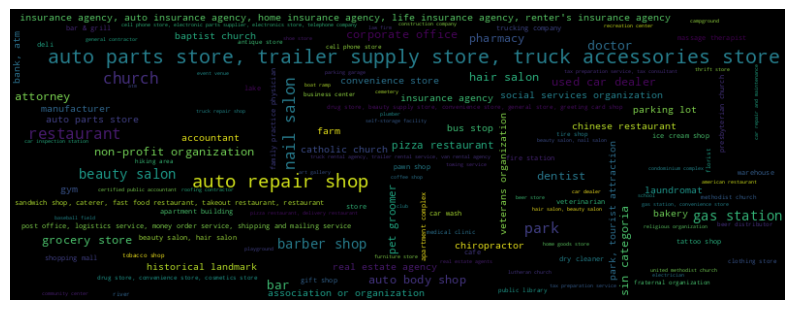

In [49]:
# Cuenta la frecuencia de cada género
frecuencia_genero = comercios_pa['category'].value_counts()
top_10_genero = frecuencia_genero.head(10)

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Oservaciones:**
- El grafico 'Wordcloud' nos permite ver de manera rapida cuales son las categorias con  mas frecuencia resaltando en tamaño, en este caso hay una pariedad en los resultados, teniendo muchas categorias con simmilar frecuencia.



---
### **Grafico de barras Top 10 Categorías más Comunes:**


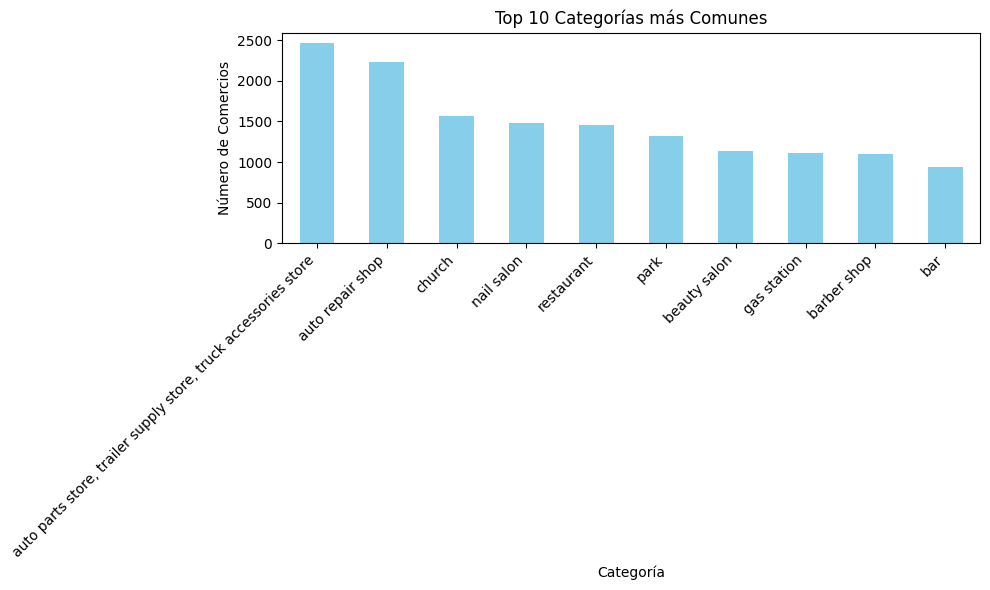


top_10_categorias:
auto parts store, trailer supply store, truck accessories store    2467
auto repair shop                                                   2226
church                                                             1572
nail salon                                                         1476
restaurant                                                         1458
park                                                               1317
beauty salon                                                       1133
gas station                                                        1116
barber shop                                                        1100
bar                                                                 936
Name: category, dtype: int64


In [50]:
# Obtener las 10 categorías más comunes y contar sus ocurrencias
top_10_categorias = comercios_pa['category'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_categorias.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías más Comunes')
plt.xlabel('Categoría')
plt.ylabel('Número de Comercios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.tight_layout()
plt.show()
print(f'\ntop_10_categorias:\n{top_10_categorias}')

**Observaciones:**
- Se genera un grafico con las 10 categorias mas importantes de comercios en el Estado de Pennsilvania, en el cual se puede observar que la categoria 'restaurant' es la N° 5.





---

### **Porcentaje de Categorías con "restaurant" vs Otras Categorías**

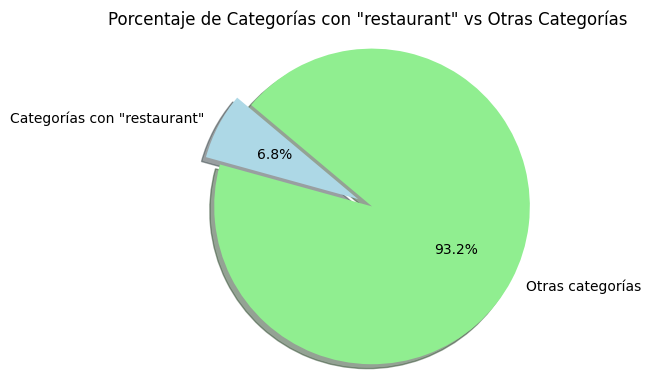


La cantidad de Categorias: 126462
La cantidad de Categorias "Restaurant": 8635
La cantidad de Categorias "No_Restaurant": 117827


In [51]:
# Filtrar el DataFrame para obtener las filas donde la columna 'category' contiene la palabra 'restaurant'
restaurantes = comercios_pa[comercios_pa['category'].str.contains('restaurant', case=False, na=False)]

# Contar las ocurrencias de cada categoría y calcular los porcentajes
total_categorias = len(comercios_pa['category'])
categorias_restaurant = len(restaurantes)
categorias_no_restaurant = total_categorias - categorias_restaurant

porcentaje_restaurant = (categorias_restaurant / total_categorias) * 100
porcentaje_no_restaurant = (categorias_no_restaurant / total_categorias) * 100

# Crear la figura de torta
labels = ['Categorías con "restaurant"', 'Otras categorías']
sizes = [porcentaje_restaurant, porcentaje_no_restaurant]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Porcentaje de Categorías con "restaurant" vs Otras Categorías')
plt.tight_layout()
plt.show()
print(f'\nLa cantidad de Categorias: {total_categorias}')
print(f'La cantidad de Categorias "Restaurant": {categorias_restaurant}')
print(f'La cantidad de Categorias "No_Restaurant": {categorias_no_restaurant}')

**Observaciones:**
- Las categorias 'restaurant'  representa un 7% del total de las actividades de comercios, siendo un gran porcentaje, debido a la cantidad de categorias que hay en el estado de Pennsylvania.



---


### **Restaurantes en el Estado de Pennsylvania:**

In [52]:
# VIsualizacion General del DataFrame
restaurantes_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8671 entries, 0 to 8670
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8671 non-null   object 
 1   address            8671 non-null   object 
 2   gmap_id            8671 non-null   object 
 3   latitude           8671 non-null   float64
 4   longitude          8671 non-null   float64
 5   category           8671 non-null   object 
 6   avg_rating         8671 non-null   float64
 7   num_of_reviews     8671 non-null   int64  
 8   price              4368 non-null   object 
 9   hours              7792 non-null   object 
 10  Service options    8476 non-null   object 
 11  Amenities          6346 non-null   object 
 12  Atmosphere         5771 non-null   object 
 13  Crowd              4071 non-null   object 
 14  Highlights         2696 non-null   object 
 15  Popular for        5269 non-null   object 
 16  Offerings          6560 



---
### **Top 10 Restaurantes más Comunes**


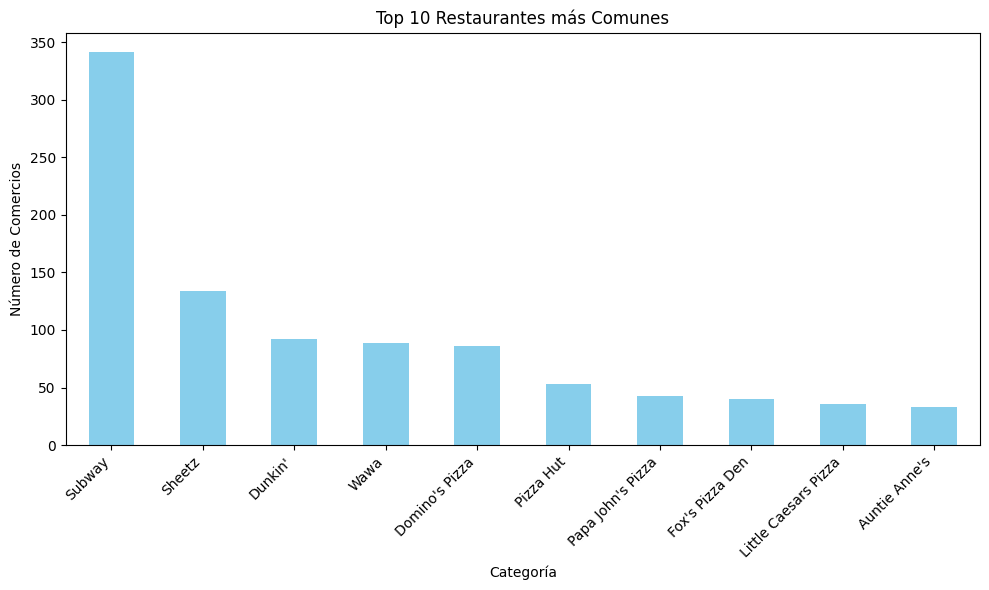


top_10_restaurantes:
Subway                  341
Sheetz                  134
Dunkin'                  92
Wawa                     89
Domino's Pizza           86
Pizza Hut                53
Papa John's Pizza        43
Fox's Pizza Den          40
Little Caesars Pizza     36
Auntie Anne's            33
Name: name, dtype: int64


In [53]:
# Obtener las 10 categorías más comunes y contar sus ocurrencias
top_10_restaurantes = restaurantes_pa['name'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_restaurantes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Restaurantes más Comunes')
plt.xlabel('Categoría')
plt.ylabel('Número de Comercios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.tight_layout()
plt.show()
print(f'\ntop_10_restaurantes:\n{top_10_restaurantes}')

**Observaciones:**
- En el ranking de los 10 de mayor frecuencia hay un predominio de los 'restaurant' de modalidad 'Fast Food'.
- Decidimos a eligir a Subway debido a su mayor frecuencia entre todos los restaurantes.



---


### **Restaurant Fast Food"  vs "Restaurant No Fast Food**

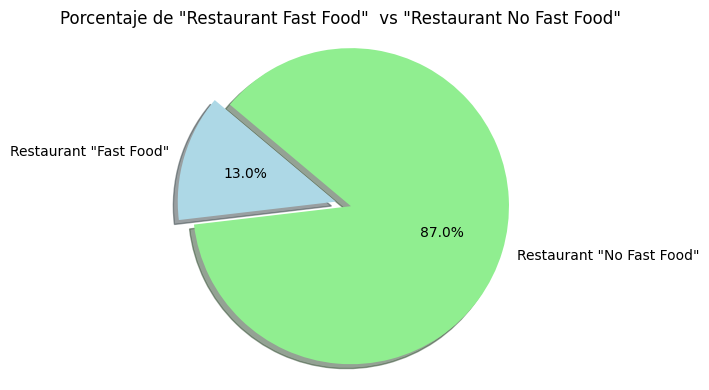


La cantidad de "Restaurant": 8635
La cantidad de "Restaurant" "Fast Food": 1120
La cantidad de "Restaurant" "No Fast Food": 7515

Porcentaje del TOP 10 de Restaurantes Fast Food:
Subway: 339 (30.27%)
Dunkin': 91 (8.12%)
Wawa: 89 (7.95%)
Rita's Italian Ice & Frozen Custard: 31 (2.77%)
McDonald's: 27 (2.41%)
Little Caesars Pizza: 22 (1.96%)
Burger King: 22 (1.96%)
Dunkin: 21 (1.88%)
Pizza Hut: 17 (1.52%)
Taco Bell: 17 (1.52%)


In [54]:
# Filtrar el DataFrame para obtener las filas donde la columna 'category' contiene la palabra 'fast food'
fastfood_restaurants = restaurantes_pa[restaurantes_pa['category'].str.contains('fast food', case=False)]

# Contar las ocurrencias de cada categoría y calcular los porcentajes
total_categorias_restaurant = categorias_restaurant
categorias_restaurant_fastfood = len(fastfood_restaurants)
categorias_no_restaurant_fastfood = total_categorias_restaurant - categorias_restaurant_fastfood

porcentaje_restaurant_fastfood = (categorias_restaurant_fastfood / total_categorias_restaurant) * 100
porcentaje_no_restaurant_fastfood = (categorias_no_restaurant_fastfood / total_categorias_restaurant) * 100

# Crear la figura de torta
labels = ['Restaurant "Fast Food"', 'Restaurant "No Fast Food"']
sizes = [porcentaje_restaurant_fastfood, porcentaje_no_restaurant_fastfood]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Porcentaje de "Restaurant Fast Food"  vs "Restaurant No Fast Food" ')
plt.tight_layout()
plt.show()
print(f'\nLa cantidad de "Restaurant": {total_categorias_restaurant}')
print(f'La cantidad de "Restaurant" "Fast Food": {categorias_restaurant_fastfood}')
print(f'La cantidad de "Restaurant" "No Fast Food": {categorias_no_restaurant_fastfood}')
print(f'\nPorcentaje del TOP 10 de Restaurantes Fast Food:')

# Contar el número total de restaurantes de comida rápida
total_fastfood = fastfood_restaurants['name'].value_counts().sum()

# Calcular el porcentaje para cada restaurante de comida rápida
porcentaje_por_restaurante = (fastfood_restaurants['name'].value_counts() / total_fastfood) * 100

# Mostrar los 10 primeros restaurantes de comida rápida junto con sus porcentajes
top_10_fastfood = fastfood_restaurants['name'].value_counts().head(10)
for nombre_restaurante, cantidad in top_10_fastfood.items():
    porcentaje = porcentaje_por_restaurante[nombre_restaurante]
    print(f"{nombre_restaurante}: {cantidad} ({porcentaje:.2f}%)")

**Observaciones:**
- El porcentaje de 'restaurant' de tipo 'Fast Food' tienen un gran numero de frecuencia, similar al que presenta la categoria 'restaurant' con respecto a otras, siendo un porcentaje alto.
- Haciendo un Ranking entre los 'restaurant' de tipo 'Fast Food', 'Subway' predomina en Pennsylvania, con gran diferencia con respectos a otros teniendo el alto porcentaje aproximadamente de un 30%.



---


## **Guardar el DataFrame:**

In [55]:
# Guardar el DataFrame comprimido en Parquet
restaurantes_pa.to_parquet('restaurantes_pa.parquet')

In [56]:
# Guardar el DataFrame comprimido en Parquet
comercios_pa.to_parquet('comercios_pa.parquet')



---



---

## **Google Maps Review Estados:**

## **Cargar los archivos:**

In [57]:
# Crear desde el  archivo JSON en un DataFrarame
data_folder = '/content/drive/MyDrive/Colab Notebooks/Proyecto Final/Data/review-Pennsylvania'
file_names_to_read = ['1.json', '2.json', '3.json', '4.json', '5.json', '6.json', '7.json', '8.json', '9.json', '10.json', '11.json', '12.json', '13.json', '14.json', '15.json', '16.json']
rows = []

for filename in file_names_to_read:
    file_path = os.path.join(data_folder, filename)
    with open(file_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                rows.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {filename}: {e}")

google_review_estados = pd.DataFrame(rows)

Cargamos los datos del Estado de Nueva York, lugar elegido para realizar el analisis.
Lo guardamos en una variable en forma de DataFrame.



---
## **Visualizacion General del DataFrame:**


In [58]:
# Observar el tipo de variable y cantidad de entradas
google_review_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 146.5+ MB


In [59]:
# Visualizar los 5 primeros resgistros
google_review_estados.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,104944742559079759337,Jaron Whitfield,1517731762839,5,"Joe is quite unique of his line of work, he as...",None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb
1,117609702832980320437,Jonathan McCarthy,1476276291163,5,For such a small place their impact on my life...,None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb
2,110563242018426632956,Rocky Kev,1338826945578,5,I usually give them a call before I stop by to...,None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb
3,112895973505401399406,Josep Valls,1363286110554,5,My bike had been sitting outdoors for a good w...,None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb
4,110619674885963828884,Timaree Schmit,1548798329760,5,Always an easy experience. Service is knowledg...,None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb




---

## **Descripcion de las Columnas:**

- user_id: Identidficador de Usuario unico.
- name: Nombre del usuario.
- time: Tiempo en la App.
- rating: Clasificacion que el Usuario ingresa.
- text: Comentario que realiza el Usuario.
- pics: Foto que sube el Usuario.
- resp: Respuesta al Comentario realizado-
- gmap_id: Identificador Unico del Comercio.



---

## **Cuantificar Valores Nulos:**

In [60]:
# Cantidad total de nulos
total_valores_nulos = google_review_estados.isna().sum().sum()
print(f'Cantidad total de valores Nulos: {total_valores_nulos}')

Cantidad total de valores Nulos: 5483465


In [61]:
# Cantidad total de valores en el DataFrame
total_valores = google_review_estados.size

# Calcular el porcentaje de valores nulos
porcentaje_valores_nulos = (total_valores_nulos / total_valores) * 100

print(f'Porcentaje de valores Nulos: {porcentaje_valores_nulos:.2f}%')


Porcentaje de valores Nulos: 28.56%


In [62]:
# Valores Nulos por variable
valores_nulos = google_review_estados.isna().sum()
print(f'Cantidad total de valores Nulos por Columna:\n{valores_nulos}')

Cantidad total de valores Nulos por Columna:
user_id          0
name             0
time             0
rating           0
text       1041386
pics       2342190
resp       2099889
gmap_id          0
dtype: int64


In [63]:
# Cantidad de valores nulos en cada columna
total_valores_nulos = google_review_estados.isna().sum()
# Porcentaje de valores nulos en cada columna
porcentaje_valores_nulos = (total_valores_nulos / len(google_review_estados)) * 100
# Mostrar los porcentajes por columnas
print(porcentaje_valores_nulos)


user_id     0.000000
name        0.000000
time        0.000000
rating      0.000000
text       43.391083
pics       97.591250
resp       87.495375
gmap_id     0.000000
dtype: float64


## **Observaciones:**
- El DataFrame Presenta un 28.69% de valores nulos, es un alto porcentaje, siendo las variables que mas afectan al total son las de : 'pics', 'resp' superando un 90% y 'text' mayor al 40%.
- Estos porcentajes indican que las personas que ingresan a la aplicacion suben muy pocas Fotos, comentan menos de la mitad y hay una baja interaccion de los 'restaurant' en responder a las criticas de los Usuarios.



---


## **Eliminar Columnas:**

In [64]:
# Se modifoca el nombre de las columnas
google_review_estados = google_review_estados.rename(columns={'text': 'text_usuario', 'time': 'time_usuario'})

In [65]:
# Se eliminan las columnas que no seran utilizadas para el analisis
google_review_estados = google_review_estados.drop(columns=['pics'])

**Observaciones:**

- Eliminamos la columna 'pics' y 'time' debido a que no proporcionan informacion relevante para el analisis y poseen valores nulos en la mayoria de sus celdas.

## **Modificacion de las Columnas:**

In [66]:
# Expandir el diccionario en la columna 'MISC' en nuevas columnas
misc_expandido = json_normalize(google_review_estados['resp'])

In [67]:
# Reinicio de indices de ambos DataFrames
google_review_estados.reset_index(drop=True, inplace=True)
misc_expandido.reset_index(drop=True, inplace=True)

# Concatenar las nuevas columnas al DataFrame original
google_review_estados = pd.concat([google_review_estados, misc_expandido], axis=1)

In [68]:
# Eliminar las columnas 'resp', 'time' si ya no la necesitas
google_review_estados.drop(columns=['resp'], inplace=True)

Al igual que la columna 'MISC' del dataframe anterior, la columna 'resp' se encuentra de forma json anidad, por lo que se decide a realizar el mismo tratamiento.
Generar un nuevo dadtaframe, para luego unir por el eje de las columnas y eliminar la columna 'resp' que ya no se de uso.

In [69]:
google_review_estados.head()

,user_id,name,time_usuario,rating,text_usuario,gmap_id,time,text
0,104944742559079759337,Jaron Whitfield,1517731762839,5,"Joe is quite unique of his line of work, he as...",0x89c6c63c8cd87141:0x54d0d283872eecbb,NaN,NaN
1,117609702832980320437,Jonathan McCarthy,1476276291163,5,For such a small place their impact on my life...,0x89c6c63c8cd87141:0x54d0d283872eecbb,NaN,NaN
2,110563242018426632956,Rocky Kev,1338826945578,5,I usually give them a call before I stop by to...,0x89c6c63c8cd87141:0x54d0d283872eecbb,NaN,NaN
3,112895973505401399406,Josep Valls,1363286110554,5,My bike had been sitting outdoors for a good w...,0x89c6c63c8cd87141:0x54d0d283872eecbb,NaN,NaN
4,110619674885963828884,Timaree Schmit,1548798329760,5,Always an easy experience. Service is knowledg...,0x89c6c63c8cd87141:0x54d0d283872eecbb,NaN,NaN




---

## **Valores Duplicados:**

In [70]:
# Contarlos los valores duplicados
duplicados = google_review_estados.duplicated().sum()
print(f'Cantidad de Valores duplicados: {duplicados}')

Cantidad de Valores duplicados: 33568


In [71]:
# Encuentra las filas duplicadas en el DataFrame
filas_duplicadas = google_review_estados[google_review_estados.duplicated(keep=False)]

# Ordena el DataFrame por todas las columnas para que las filas duplicadas estén juntas
filas_duplicadas_ordenadas = filas_duplicadas.sort_values(by=list(filas_duplicadas.columns))

# Imprime todas las filas duplicadas ordenadas
filas_duplicadas_ordenadas.head()

,user_id,name,time_usuario,rating,text_usuario,gmap_id,time,text
1045802,100000637476479610210,Ashley Vinglas,1547653489851,4,I use this salon frequently and have always ha...,0x89cb9220fa1b3327:0x229158d86e724029,NaN,NaN
1045804,100000637476479610210,Ashley Vinglas,1547653489851,4,I use this salon frequently and have always ha...,0x89cb9220fa1b3327:0x229158d86e724029,NaN,NaN
893911,100001454773480675112,madipup19,1516759352362,5,"Movies. Groceries, clothes, book store, restau...",0x8834ed116ca44a5d:0xfda4acb3f6cced49,NaN,NaN
893930,100001454773480675112,madipup19,1516759352362,5,"Movies. Groceries, clothes, book store, restau...",0x8834ed116ca44a5d:0xfda4acb3f6cced49,NaN,NaN
727353,100002281152843175986,Elizabeth Pulaski,1567530025535,3,The reason why I gave this place a 3 star revi...,0x89c6c9d3cdb22fa5:0xc3a7945fc68ef27a,NaN,NaN


In [72]:
# Eliminar los valores duplicados
google_review_estados = google_review_estados.drop_duplicates()

Observamos una gran cantidad de valores duplicados, los cuales fueron analizados con exhaustividad para luego proceder a eliminarlos.



---

## **Unificar los Dataframes:**

In [73]:
# Se realiza un Merge por las variables en comun
restaurantes_pa = pd.merge(restaurantes_pa, google_review_estados, on='gmap_id', how='inner')

In [74]:
# Eliminar los valores duplicados
restaurantes_pa = restaurantes_pa.drop_duplicates()

Realizamos la union de ambos DataFrame (restaurantes_ny y google_review_estados) por que de esta manera podemos usar las columnas de ambos y aprovechar al maximo la data para generar un informe mas preciso y de mayor contenido.



---


## **Convertir variable de tiempo:**

In [75]:
# Convertir la columna 'time_usuario' de marcas de tiempo a formato legible
restaurantes_pa['time_usuario'] = pd.to_datetime(restaurantes_pa['time_usuario'], unit='ms')

# Convertir la columna 'time' de marcas de tiempo a formato legible
restaurantes_pa['time'] = pd.to_datetime(restaurantes_pa['time'], unit='ms')

# Imprimir las primeras filas para verificar los cambios
print(restaurantes_pa[['time_usuario', 'time']].head())


             time_usuario                          time
0 2021-08-01 21:49:20.963                           NaT
1 2021-08-09 16:22:47.231                           NaT
2 2021-07-23 17:20:42.318 2021-07-25 04:08:11.632999936
3 2021-07-15 01:11:56.491 2021-07-25 04:11:03.324000000
4 2021-07-22 09:37:20.849                           NaT


<ipython-input-75-9e3623587363>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurantes_pa['time_usuario'] = pd.to_datetime(restaurantes_pa['time_usuario'], unit='ms')
<ipython-input-75-9e3623587363>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurantes_pa['time'] = pd.to_datetime(restaurantes_pa['time'], unit='ms')


**Observaciones:**
- El valor de 'time_usuario'y 'time' es una marca de tiempo en milisegundos. Las marcas de tiempo, en su forma más común, representan la cantidad de tiempo transcurrido desde un punto de referencia específico, generalmente la "época" o "epoch".

- La "época" es un momento específico en el tiempo que se utiliza como punto de referencia para las marcas de tiempo. En muchos sistemas informáticos y bases de datos, la "época" se define como el comienzo del 1 de enero de 1970 (UTC), conocido como "época Unix". Las marcas de tiempo se cuentan en segundos o milisegundos desde este punto.




---
## **Analisis General de los DataFrame combinados:**


In [76]:
# Reiniciar el indice
restaurantes_pa = restaurantes_pa.reset_index(drop=True)

In [77]:
# Observar el tipo de variable y cantidad de entradas
restaurantes_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410166 entries, 0 to 410165
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   name_x             410166 non-null  object        
 1   address            410166 non-null  object        
 2   gmap_id            410166 non-null  object        
 3   latitude           410166 non-null  float64       
 4   longitude          410166 non-null  float64       
 5   category           410166 non-null  object        
 6   avg_rating         410166 non-null  float64       
 7   num_of_reviews     410166 non-null  int64         
 8   price              327127 non-null  object        
 9   hours              392167 non-null  object        
 10  Service options    402821 non-null  object        
 11  Amenities          343120 non-null  object        
 12  Atmosphere         327376 non-null  object        
 13  Crowd              290797 non-null  object  

In [78]:
# Visualizar los 5 primeros resgistros
restaurantes_pa.head()

,name_x,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,Service options,Amenities,Atmosphere,Crowd,Highlights,Popular for,Offerings,Dining options,Planning,Health & safety,Accessibility,Payments,From the business,Health and safety,user_id,name_y,time_usuario,rating,text_usuario,time,text
0,Crown Fried Chicken,"Crown Fried Chicken, 208 East St, Bloomsburg, ...",0x89c587762e7e69dd:0x30a60dce48b073c3,41.004147,-76.453729,restaurant,4.2,18,$,"Thursday 11AM–3AM, Friday 11AM–3AM, Saturday 1...","Takeout, Dine-in, Delivery",Good for kids,Casual,NaN,NaN,Solo dining,Quick bite,NaN,Accepts reservations,NaN,NaN,NaN,NaN,NaN,116240853927540430813,Hamid Mukhtar,2021-08-01 21:49:20.963,5,Inexpensive and delicious food. Reminds me of ...,NaT,NaN
1,Crown Fried Chicken,"Crown Fried Chicken, 208 East St, Bloomsburg, ...",0x89c587762e7e69dd:0x30a60dce48b073c3,41.004147,-76.453729,restaurant,4.2,18,$,"Thursday 11AM–3AM, Friday 11AM–3AM, Saturday 1...","Takeout, Dine-in, Delivery",Good for kids,Casual,NaN,NaN,Solo dining,Quick bite,NaN,Accepts reservations,NaN,NaN,NaN,NaN,NaN,108987040068572830646,Alex King,2021-08-09 16:22:47.231,3,pros\nstaff were nice\nprices were good for qu...,NaT,NaN
2,Crown Fried Chicken,"Crown Fried Chicken, 208 East St, Bloomsburg, ...",0x89c587762e7e69dd:0x30a60dce48b073c3,41.004147,-76.453729,restaurant,4.2,18,$,"Thursday 11AM–3AM, Friday 11AM–3AM, Saturday 1...","Takeout, Dine-in, Delivery",Good for kids,Casual,NaN,NaN,Solo dining,Quick bite,NaN,Accepts reservations,NaN,NaN,NaN,NaN,NaN,109218205375471507404,Jonathan Reed,2021-07-23 17:20:42.318,2,"The chicken was nice and crispy, but it had a ...",2021-07-25 04:08:11.632999936,Jonathan thanks for you review please stop by ...
3,Crown Fried Chicken,"Crown Fried Chicken, 208 East St, Bloomsburg, ...",0x89c587762e7e69dd:0x30a60dce48b073c3,41.004147,-76.453729,restaurant,4.2,18,$,"Thursday 11AM–3AM, Friday 11AM–3AM, Saturday 1...","Takeout, Dine-in, Delivery",Good for kids,Casual,NaN,NaN,Solo dining,Quick bite,NaN,Accepts reservations,NaN,NaN,NaN,NaN,NaN,103615682383180087623,Ben Johnson,2021-07-15 01:11:56.491,5,Loved the lamb over rice! Chicken is good but...,2021-07-25 04:11:03.324000000,Thanks Ben really appreciate your review 🙏 tha...
4,Crown Fried Chicken,"Crown Fried Chicken, 208 East St, Bloomsburg, ...",0x89c587762e7e69dd:0x30a60dce48b073c3,41.004147,-76.453729,restaurant,4.2,18,$,"Thursday 11AM–3AM, Friday 11AM–3AM, Saturday 1...","Takeout, Dine-in, Delivery",Good for kids,Casual,NaN,NaN,Solo dining,Quick bite,NaN,Accepts reservations,NaN,NaN,NaN,NaN,NaN,114033787332228485618,Chantel Blink,2021-07-22 09:37:20.849,3,Good for last min dinner,NaT,NaN




---

## **Periodo de los Comentarios:**

Al generar un periodo de tiempo nos permite ubicarnos y ponernos en contexto de los datos que poseemos.

In [79]:
# Extraer el año de la columna 'time' en el DataFrame 'restaurantes_pa'
restaurantes_pa['year'] = restaurantes_pa['time_usuario'].dt.year
# Imprimir el DataFrame con la nueva columna 'year'
restaurantes_pa[['time_usuario', 'year']].head()

,time_usuario,year
0,2021-08-01 21:49:20.963,2021
1,2021-08-09 16:22:47.231,2021
2,2021-07-23 17:20:42.318,2021
3,2021-07-15 01:11:56.491,2021
4,2021-07-22 09:37:20.849,2021


In [80]:
# Convertir la columna 'Year' en INT
restaurantes_pa['year'] = restaurantes_pa['year'].astype('Int64')

In [81]:
# Calcular el valor mínimo en la Serie
año_maximo = restaurantes_pa['year'].max()
# Calcular el valor mínimo en la Serie
año_minimo = restaurantes_pa['year'].min()

print(f'"Año_maximo" {año_maximo}')
print(f'"Año_Minimo": {año_minimo}')
print(f'El periodo que en que se realizaron los comentarios corresponde entre : {año_minimo} y {año_maximo}')

"Año_maximo" 2021
"Año_Minimo": 1990
El periodo que en que se realizaron los comentarios corresponde entre : 1990 y 2021


Podemos ver que a traves de los datos , tenemos un periodo prolongado, de 31 años. lo cual nos puede brindar informacion valiosa en cueanto al comportamiento de los interactuantes.

In [82]:
restaurantes_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410166 entries, 0 to 410165
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   name_x             410166 non-null  object        
 1   address            410166 non-null  object        
 2   gmap_id            410166 non-null  object        
 3   latitude           410166 non-null  float64       
 4   longitude          410166 non-null  float64       
 5   category           410166 non-null  object        
 6   avg_rating         410166 non-null  float64       
 7   num_of_reviews     410166 non-null  int64         
 8   price              327127 non-null  object        
 9   hours              392167 non-null  object        
 10  Service options    402821 non-null  object        
 11  Amenities          343120 non-null  object        
 12  Atmosphere         327376 non-null  object        
 13  Crowd              290797 non-null  object  



---
### **Reseñas y Comentarios realizados por Usuarios en Pennsylvania:**


Decidimos generar tres variables: una destinada al total de restaurantes, otra con el total de datos correspondientes a 'restaurantes Fast Food', que son la compentecia del que eligimos como objeto de analisis y nos brinda informacion importante. Por ultimo la variable 'restaurante Subway', el elegido para el analisis.

### **Total de Reseñas del Total de Restaurantes:**

In [83]:
# Crea una variable con el total de personas que dejaron una calificacion del local
total_reseñas = restaurantes_pa['text_usuario'].count()

# Se crea variable con clientes que no inresaron comentarios
total_reseñas_sin_comentarios = restaurantes_pa['text_usuario'].isna().sum()

# Se crea variable con clientes que inresaron comentarios
total_reseñas_con_comentarios = total_reseñas - total_reseñas_sin_comentarios


### **Total de Reseñas del Total de Restaurantes Fast Food:**

In [84]:
# Filtrar el DataFrame para obtener las filas donde la columna 'category' contiene la palabra 'fast food'
fastfood_restaurants_reseñas = restaurantes_pa[restaurantes_pa['category'].str.contains('fast food', case=False)]
total_fastfood_restaurants_reseñas = fastfood_restaurants_reseñas[fastfood_restaurants_reseñas['category'].str.contains('fast food', case=False)].shape[0]

# Se crea variable con clientes que no inresaron comentarios
total_fastfood_restaurants_sin_comentarios = fastfood_restaurants_reseñas['text_usuario'].isna().sum()

# Se crea variable con clientes que inresaron comentarios
total_fastfood_restaurants_con_comentarios = total_reseñas - total_reseñas_sin_comentarios


### **Total de Reseñas de Subway:**

In [85]:
# Filtrar el DataFrame para obtener las filas donde la columna 'name_x' contiene la palabra 'subway'
subway_reseñas = restaurantes_pa[restaurantes_pa['name_x'].str.contains('subway', case=False)]
total_subway_reseñas = subway_reseñas[subway_reseñas['name_x'].str.contains('subway', case=False)].shape[0]

# Se crea variable con clientes que no inresaron comentarios
total_total_subway_reseñas_sin_comentarios = subway_reseñas['text_usuario'].isna().sum()

# Se crea variable con clientes que inresaron comentarios
total_total_subway_reseñas_con_comentarios = total_reseñas - total_reseñas_sin_comentarios




---



---



### **Porcentaje de Comentarios de Fast Food y Subway con respecto al total de Reseñas**

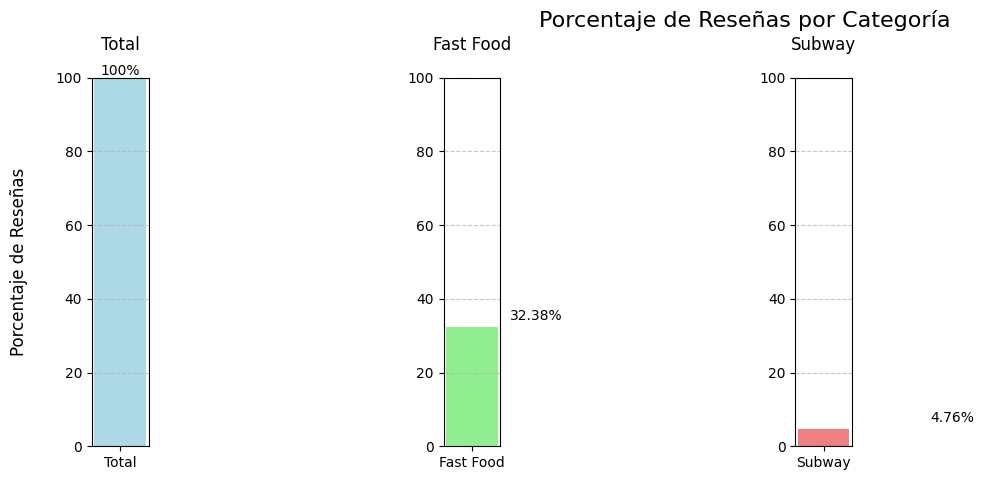

In [109]:
# Calcular porcentajes
porcentaje_reseñas_fastfood = total_fastfood_restaurants_reseñas / total_reseñas * 100
porcentaje_reseñas_subway = total_subway_reseñas / total_reseñas * 100

# Crear datos para los subgráficos
categorias = ['Total', 'Fast Food', 'Subway']
porcentajes = [100, porcentaje_reseñas_fastfood, porcentaje_reseñas_subway]

# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico para Total
axs[0].bar('Total', 100, color='lightblue')
axs[0].set_ylabel('Porcentaje de Reseñas', labelpad=20, loc='center', fontsize=12)
axs[0].set_title('Total', pad=20)  # Ajustar la posición del título
axs[0].set_ylim(0, 100)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico para Fast Food
axs[1].bar('Fast Food', porcentaje_reseñas_fastfood, color='lightgreen')
axs[1].set_title('Fast Food', pad=20)  # Ajustar la posición del título
axs[1].set_ylim(0, 100)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].text(1, porcentaje_reseñas_fastfood + 1, f'{porcentaje_reseñas_fastfood:.2f}%', ha='center', va='bottom')
axs[0].text(0, 100, '100%', ha='center', va='bottom')

# Gráfico para Subway
axs[2].bar('Subway', porcentaje_reseñas_subway, color='lightcoral')
axs[2].set_title('Subway', pad=20)  # Ajustar la posición del título
axs[2].set_ylim(0, 100)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
axs[2].text(2, porcentaje_reseñas_subway + 1, f'{porcentaje_reseñas_subway:.2f}%', ha='center', va='bottom')

# Ajustar la distancia entre el título general y los subgráficos
plt.suptitle('Porcentaje de Reseñas por Categoría', fontsize=16, y=0.95)

plt.tight_layout()
plt.show()


**Observaciones:**
- Teniendo en cuenta la gran cantidad de categorias, los Fast Food generan una buena proporcion de comentarios.

- Esto nos da una idea del comportamiento de los clientes en estos establecimientos, debido a la cantidad que hay se podria mejorar el la cantidad de interaccion del cliente.

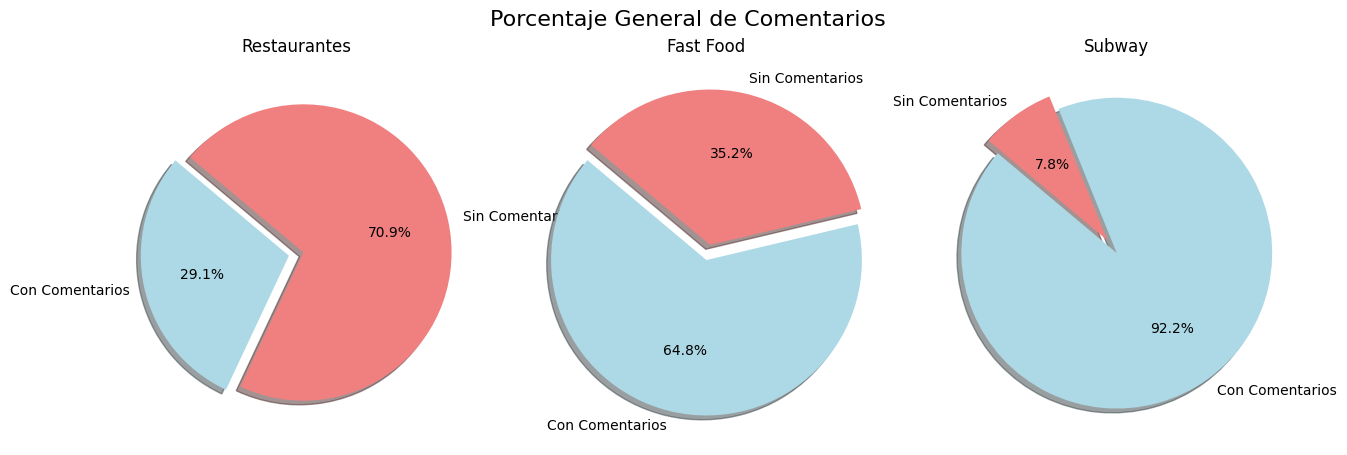


Restaurantes
Cantidad de Reseñas: 240028
Cantidad de Reseñas sin comentarios: 170138
Cantidad de Reseñas con comentarios: 69890

Fast Food
Cantidad de Reseñas: 77725
Cantidad de Reseñas sin comentarios: 37934
Cantidad de Reseñas con comentarios: 69890

Subway
Cantidad de Reseñas: 11414
Cantidad de Reseñas sin comentarios: 5892
Cantidad de Reseñas con comentarios: 69890


In [110]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico para Restaurantes
labels = ['Con Comentarios', 'Sin Comentarios']
sizes = [total_reseñas_con_comentarios, total_reseñas_sin_comentarios]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Separación de las secciones

axs[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0].axis('equal')  # Asegurar que la torta sea circular
axs[0].set_title('Restaurantes')

# Gráfico para Restaurantes Fast Food
labels = ['Con Comentarios', 'Sin Comentarios']
sizes = [total_fastfood_restaurants_con_comentarios, total_fastfood_restaurants_sin_comentarios]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Separación de las secciones

axs[1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].axis('equal')  # Asegurar que la torta sea circular
axs[1].set_title('Fast Food')

# Gráfico para Restaurantes Subway
labels = ['Con Comentarios', 'Sin Comentarios']
sizes = [total_total_subway_reseñas_con_comentarios, total_total_subway_reseñas_sin_comentarios]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Separación de las secciones

axs[2].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[2].axis('equal')  # Asegurar que la torta sea circular
axs[2].set_title('Subway')

# Ajustar el título general
plt.suptitle('Porcentaje General de Comentarios', fontsize=16)

plt.show()

print(f'\nRestaurantes')
print(f'Cantidad de Reseñas: {total_reseñas}')
print(f'Cantidad de Reseñas sin comentarios: {total_reseñas_sin_comentarios}')
print(f'Cantidad de Reseñas con comentarios: {total_reseñas_con_comentarios}')

print(f'\nFast Food')
print(f'Cantidad de Reseñas: {total_fastfood_restaurants_reseñas}')
print(f'Cantidad de Reseñas sin comentarios: {total_fastfood_restaurants_sin_comentarios}')
print(f'Cantidad de Reseñas con comentarios: {total_fastfood_restaurants_con_comentarios}')

print(f'\nSubway')
print(f'Cantidad de Reseñas: {total_subway_reseñas}')
print(f'Cantidad de Reseñas sin comentarios: {total_total_subway_reseñas_sin_comentarios}')
print(f'Cantidad de Reseñas con comentarios: {total_total_subway_reseñas_con_comentarios}')



**Observaciones:**
- Los restaurantes en general en la ciudad de Pennsylvania presentan un buen porcentaje de clientes que comenta, siendo un tercio del total. Con esto inferimos que gran cantidad de personas comentan y briandan informacion para mejoras de los establecimientos y datos para los otros usuarios.
- La proporcion de los Fast Food, es menor que la anterior, teniendo una gran cantidad de reseñas. Esto nos brinda una posibilidad de mejora.

- En cuanto a Subway la proporcion es casi optima, con un valor muy elevado, lo que significa que la mayoria de personas que ingresa al establecimiento genera informacion no solo con reseña, sino que tambien comenta.





---



---



### **Evolución de la Cantidad de Comentarios por Año**

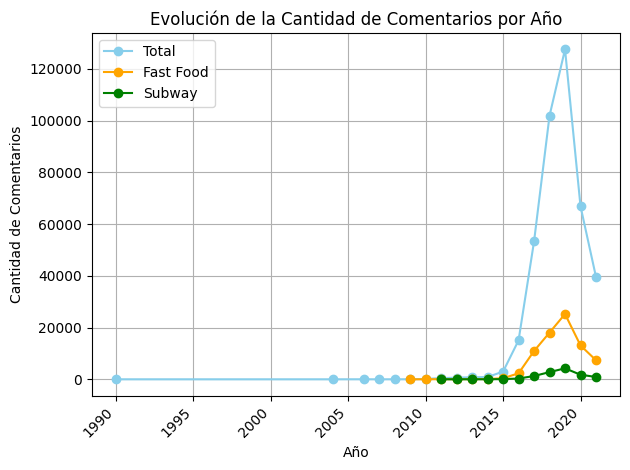

In [88]:
# Contar la cantidad de comentarios por año
comentarios_restaurantes_por_año = restaurantes_pa.groupby('year').size()
comentarios_fastfood_restaurants_reseñas_por_año = fastfood_restaurants_reseñas.groupby('year').size()
comentarios_subway_reseñas_por_año = subway_reseñas.groupby('year').size()

# Graficar los datos para cada tipo de restaurante
comentarios_restaurantes_por_año.plot(color='skyblue', marker='o', linestyle='-', label='Total')
comentarios_fastfood_restaurants_reseñas_por_año.plot(color='orange', marker='o', linestyle='-', label='Fast Food')
comentarios_subway_reseñas_por_año.plot(color='green', marker='o', linestyle='-', label='Subway')

# Etiquetas y título
plt.title('Evolución de la Cantidad de Comentarios por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Comentarios')

# Leyenda
plt.legend()

# Personalización de los ejes
plt.xticks(rotation=45, ha='right')
plt.grid(True)  # Agregar rejilla al gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**Observaciones:**
- El grafico nos permite inferir que a medida que aumentaron los Años, con los avances de la tecnolgia y la interaccion de los usuarios con app que los coenctan con los establecimientos, se produjo un gran aumento entre el periodo del 2008 y 2020 de manera similar en las tres variables, teniendo en cuenta su proporcion. En el ultimo año se observa una caida brusca, debido al confinamiento por causa de la Pandemia producida por el COVID-19.



---

### **Descripcion Estadistica de los Años y cantidad de reseñas:**

In [89]:
# Descricion del total de restaurantes
restaurantes_pa['year'].describe()
print(restaurantes_pa['year'].describe())
print(f'\nCantidad de comentarios por Ano: {restaurantes_pa["year"].value_counts()}')

count       410166.0
mean     2018.661696
std         1.402838
min           1990.0
25%           2018.0
50%           2019.0
75%           2020.0
max           2021.0
Name: year, dtype: Float64

Cantidad de comentarios por Ano: 2019    127536
2018    101882
2020     66877
2017     53283
2021     39577
2016     15054
2015      2979
2014       893
2013       790
2012       636
2011       461
2010       149
2009        18
2006        14
2008        12
2004         3
1990         1
2007         1
Name: year, dtype: Int64


**Observaciones:**

- La media del año de reseñas es aproximadamente 2018.55.

- El rango de años va desde 1990 hasta 2021, lo que sugiere una amplia variedad en la antigüedad de los restaurantes en la región.

- El 25% de las reseñas de restaurantes se producen en 2018 o antes, mientras que el 75% se establecieron en 2020 o antes, lo que indica una concentración relativamente alta de establecimientos más recientes.

- El año con más reseñas parece ser 2019, ya que es el año en el que se encuentra la mediana (50% de las reseñas en 2019 o antes).

- La distribución  sugiere una cierta tendencia hacia la mayor generacion de reseñas en los últimos años, especialmente alrededor de 2018 y 2019.




In [90]:
# Descricion del total de restaurantes Fast Food
print(fastfood_restaurants_reseñas['year'].describe())
print(f'\nCantidad de comentarios por Ano: {fastfood_restaurants_reseñas["year"].value_counts()}')

count     77725.0
mean     2018.709
std      1.330736
min        2009.0
25%        2018.0
50%        2019.0
75%        2020.0
max        2021.0
Name: year, dtype: Float64

Cantidad de comentarios por Ano: 2019    25235
2018    18061
2020    13085
2017    10943
2021     7370
2016     2315
2015      420
2014       98
2013       82
2011       54
2012       51
2010       10
2009        1
Name: year, dtype: Int64


In [91]:
# Descricion del total de restaurantes Subway
print(subway_reseñas['year'].describe())
print(f'\nCantidad de comentarios por Ano: {subway_reseñas["year"].value_counts()}')

count        11414.0
mean     2018.710356
std           1.2716
min           2011.0
25%           2018.0
50%           2019.0
75%           2019.0
max           2021.0
Name: year, dtype: Float64

Cantidad de comentarios por Ano: 2019    4244
2018    2789
2020    1767
2017    1269
2021     908
2016     306
2015      78
2014      17
2013      16
2011      11
2012       9
Name: year, dtype: Int64




---
### **Grafico de Caja para detallar los 'Outliers':**


<ipython-input-92-fcb4b5a99c9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastfood_restaurants_reseñas['year'] = fastfood_restaurants_reseñas['year'].astype('Int64')
<ipython-input-92-fcb4b5a99c9a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_reseñas['year'] = subway_reseñas['year'].astype('Int64')


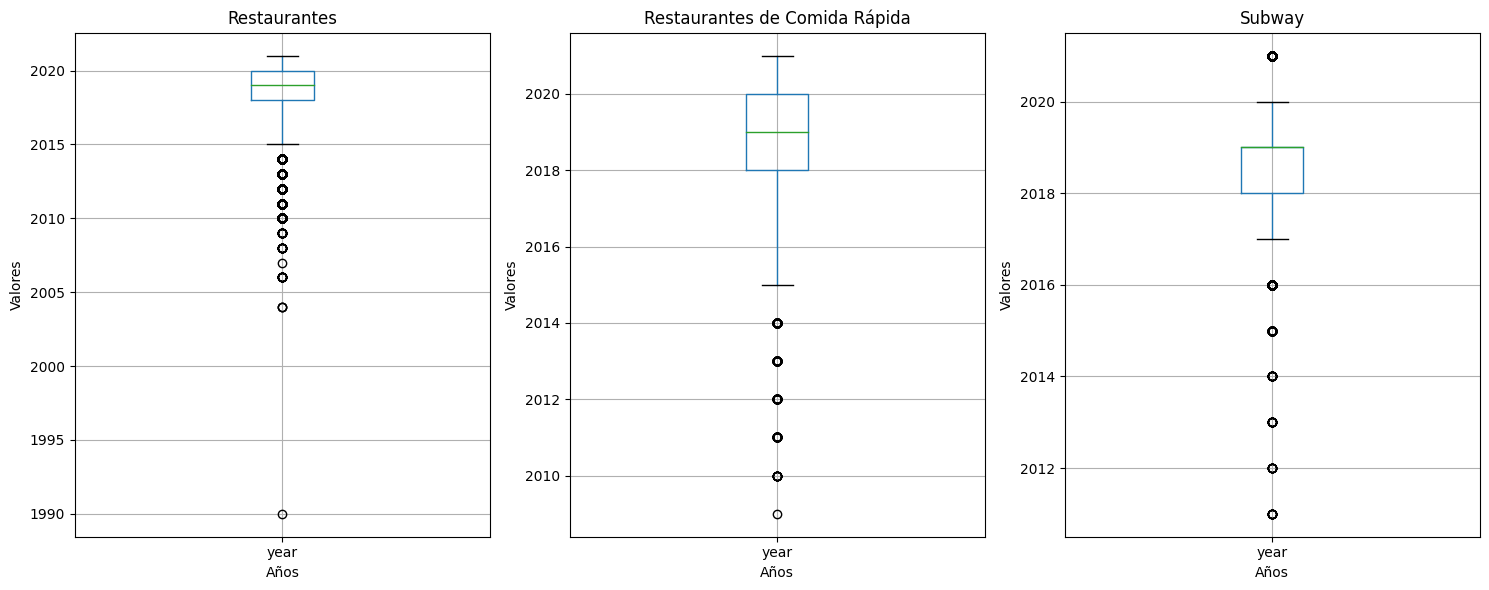

In [92]:
# Convertir la columna 'year' a tipo 'Int64' si no lo está
restaurantes_pa['year'] = restaurantes_pa['year'].astype('Int64')

# Convertir la columna 'year' a tipo 'Int64' si no lo está
fastfood_restaurants_reseñas['year'] = fastfood_restaurants_reseñas['year'].astype('Int64')

# Convertir la columna 'year' a tipo 'Int64' si no lo está
subway_reseñas['year'] = subway_reseñas['year'].astype('Int64')

# Crear el gráfico de boxplots
plt.figure(figsize=(15, 6))

# Boxplot para restaurantes_ny
plt.subplot(1, 3, 1)
restaurantes_pa.boxplot(column='year')
plt.title('Restaurantes')
plt.xlabel('Años')
plt.ylabel('Valores')
plt.grid(True)

# Boxplot para fastfood_restaurants_reseñas
plt.subplot(1, 3, 2)
fastfood_restaurants_reseñas.boxplot(column='year')
plt.title('Restaurantes de Comida Rápida')
plt.xlabel('Años')
plt.ylabel('Valores')
plt.grid(True)

# Boxplot para subway_reseñas
plt.subplot(1, 3, 3)
subway_reseñas.boxplot(column='year')
plt.title('Subway')
plt.xlabel('Años')
plt.ylabel('Valores')
plt.grid(True)

plt.tight_layout()
plt.show()


**Observaciones:**

- En el primer grafico de restaurantes se puede observar una caja simetrica, en donde la mediana se ubica aproximadamente entre los años 2019 y la mayor concentracion de los datos entre 2018 y 2020. Se puede observar la presencia de Outliers, entre 1990 y 2014.

- En el segundo grafico de Fast Food se puede observar una caja simetrica, en donde la mediana se ubica aproximadamente entre los años 2019 y la mayor concentracion de los datos entre 2018 y 2020. Se puede observar la presencia de Outliers, entre 2004 y 2014.

- En el tercer grafico de Fast Food se puede observar una caja asimetrica, presenta un sesgo negativo, hacia la izquierda en donde la mediana se ubica aproximadamente en los años 2019 y es muy similar al tercer cuartil. La concentracion de los datos entre 2018 y 2019. Se puede observar la presencia de Outliers, entre 2008 y 2016, tambien se observan Outliers mayores al año 2020.



---
### **Promedio de Clasificaciones:**


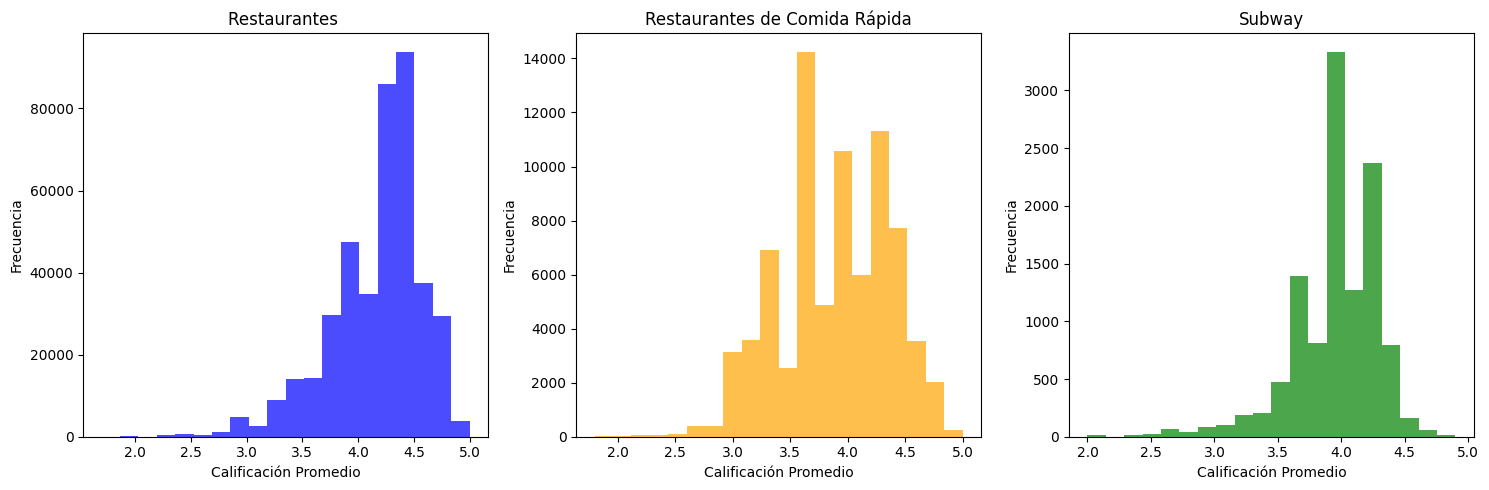


Descripcion Estadistica de Restaurantes:
count    8635.000000
mean        4.138691
std         0.582885
min         1.000000
25%         3.900000
50%         4.200000
75%         4.600000
max         5.000000
Name: avg_rating, dtype: float64

Descripcion Estadistica de Restaurantes Fast Food:
count    77725.000000
mean         3.883215
std          0.467591
min          1.800000
25%          3.600000
50%          3.900000
75%          4.200000
max          5.000000
Name: avg_rating, dtype: float64

Descripcion Estadistica de Restaurantes Subway:
count    11414.000000
mean         3.948896
std          0.350801
min          2.000000
25%          3.800000
50%          4.000000
75%          4.200000
max          4.900000
Name: avg_rating, dtype: float64


In [93]:
# Variables con los valores Rating
datos_pa = restaurantes_pa['avg_rating']
datos_fastfood = fastfood_restaurants_reseñas['avg_rating']
datos_subway = subway_reseñas['avg_rating']

# Crear tres subgráficos uno al lado del otro
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histograma para restaurantes en Nueva York
axes[0].hist(datos_pa, bins=20, color='blue', alpha=0.7)
axes[0].set_title('Restaurantes ')
axes[0].set_xlabel('Calificación Promedio')
axes[0].set_ylabel('Frecuencia')

# Histograma para restaurantes de comida rápida
axes[1].hist(datos_fastfood, bins=20, color='orange', alpha=0.7)
axes[1].set_title('Restaurantes de Comida Rápida')
axes[1].set_xlabel('Calificación Promedio')
axes[1].set_ylabel('Frecuencia')

# Histograma para Subway
axes[2].hist(datos_subway, bins=20, color='green', alpha=0.7)
axes[2].set_title('Subway')
axes[2].set_xlabel('Calificación Promedio')
axes[2].set_ylabel('Frecuencia')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

print(f'\nDescripcion Estadistica de Restaurantes:\n{restaurantes_ny["avg_rating"].describe()}')
print(f'\nDescripcion Estadistica de Restaurantes Fast Food:\n{fastfood_restaurants_reseñas["avg_rating"].describe()}')
print(f'\nDescripcion Estadistica de Restaurantes Subway:\n{subway_reseñas["avg_rating"].describe()}')

**Observaciones:**

- Restaurantes Generales:

La media del promedio de rating para restaurantes generales es de aproximadamente 4.13, con una desviación estándar de 0.58. Esto indica que, en promedio, estos restaurantes son bien valorados por los clientes, con una variabilidad moderada en los ratings.
La mediana es de 4.2, lo que sugiere que la mitad de los restaurantes tienen un rating igual o superior a este valor.
La distribución de los ratings se encuentra en un rango amplio, desde 1.5 hasta 5.0, lo que indica una diversidad en las experiencias de los clientes.

- Restaurantes de Comida Rápida:

Los restaurantes de comida rápida tienen una media del promedio de rating de aproximadamente 3.94, con una desviación estándar de 0.35. Esto sugiere que, en promedio, estos restaurantes son valorados ligeramente menos que los restaurantes generales, con una menor variabilidad en los ratings.
La mediana es de 3.9, indicando que la mitad de los restaurantes de comida rápida tienen un rating igual o inferior a este valor.
El rango de ratings va desde 1.6 hasta 5.0, mostrando una amplia gama de experiencias de los clientes, aunque en promedio son ligeramente inferiores a los restaurantes generales.

- Restaurantes Subway:

Para los restaurantes Subway, la media del promedio de rating es de aproximadamente 3.80, con una desviación estándar de 0.35. Esto sugiere que estos restaurantes tienen una valoración similar a los de comida rápida, con una variabilidad similar en los ratings.
La mediana es de 4.00, indicando que la mitad de los restaurantes Subway tienen un rating igual o inferior a este valor.
El rango de ratings va desde 1.8 hasta 4.6, mostrando una menor dispersión en comparación con los restaurantes generales y de comida rápida.




---


## **Calificación Promedio por Año y Tipo de Restaurante (Años Comunes)**

In [94]:
# Agrupar por año y calcular la calificación promedio
calificacion_promedio_por_año_estaurantes = restaurantes_pa.groupby('year')['avg_rating'].mean()
calificacion_promedio_por_año_fastfood = fastfood_restaurants_reseñas.groupby('year')['avg_rating'].mean()
calificacion_promedio_por_año_subway = subway_reseñas.groupby('year')['avg_rating'].mean()

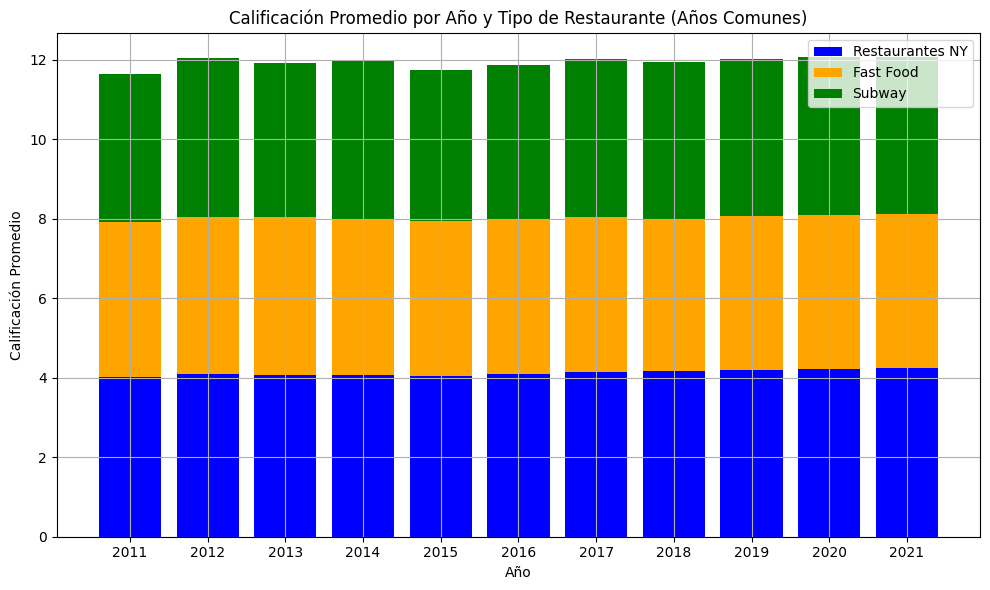

In [95]:
# Agrupar por año y calcular la calificación promedio
calificacion_promedio_por_año_estaurantes = restaurantes_pa.groupby('year')['avg_rating'].mean()
calificacion_promedio_por_año_fastfood = fastfood_restaurants_reseñas.groupby('year')['avg_rating'].mean()
calificacion_promedio_por_año_subway = subway_reseñas.groupby('year')['avg_rating'].mean()

# Obtener los años que están presentes en todos los conjuntos de datos
años_comunes = set(calificacion_promedio_por_año_estaurantes.index) & set(calificacion_promedio_por_año_fastfood.index) & set(calificacion_promedio_por_año_subway.index)

# Convertir los años comunes a una lista para mantener el orden
años_comunes = list(años_comunes)

# Filtrar los datos de calificación promedio por año para los años comunes
calificacion_promedio_ny_comunes = [calificacion_promedio_por_año_estaurantes[year] for year in años_comunes]
calificacion_promedio_fastfood_comunes = [calificacion_promedio_por_año_fastfood[year] for year in años_comunes]
calificacion_promedio_subway_comunes = [calificacion_promedio_por_año_subway[year] for year in años_comunes]

# Crear el gráfico de columnas apiladas
plt.figure(figsize=(10, 6))

# Plotear las calificaciones promedio por año para cada tipo de restaurante
plt.bar(años_comunes, calificacion_promedio_ny_comunes, label='Restaurantes NY', color='blue')
plt.bar(años_comunes, calificacion_promedio_fastfood_comunes, bottom=calificacion_promedio_ny_comunes, label='Fast Food', color='orange')
plt.bar(años_comunes, calificacion_promedio_subway_comunes, bottom=[sum(x) for x in zip(calificacion_promedio_ny_comunes, calificacion_promedio_fastfood_comunes)], label='Subway', color='green')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Año y Tipo de Restaurante (Años Comunes)')
plt.xticks(años_comunes)  # Mostrar solo los años comunes en el eje x
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


**Observaciones:**
- Se puede observar que entre los años 2009 y 2021 entre las tres variables, el comportamiento de los clientes es similar. Se mantiene constanate en los años y el valor de la calificacion.
A excepcion del entre el año 2009 y 2012 de las calificaciones de Subway hay una fluctuacion en menores las calificaciones.



---



---

